# Terrorist Attacks from 1970 to 2017
##### Sergei Burykin, Martin Ekar Fidermuc, Nejc Košir, 2019

### A trend analysis of the terrorism shifts throughout the years.

### Our dataset is comprised of interesting columns. The data includes many things, the ones that stood out to us:
#### - the date of the terror attack, 
#### - country it happened it,
#### - weapons used in the attack
####  - whether the attack was a bombing, kidnapping, assassination, etc,
#### - if it was a kidnapping, what the ransom note asked for,
#### - the number of assailants, casualties,
#### - nationality of the assailants and the terror group they are linked to

In [4]:
#IMPORTS
from csv import DictReader
import collections

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [16]:
def read_csv(file_name):
    global reader
    fp = open(file_name, encoding="ISO-8859-1")
    reader = DictReader(fp)
read_csv('globaloffensive.csv')
list_of_months = []
for row in reader:
    list_of_months.append(row['imonth'])
month_to_nEvents = collections.defaultdict(int)
for cifra in list_of_months:
    if int(cifra) == 0: pass
    else:
        month_to_nEvents[int(cifra)] += 1
g = collections.OrderedDict(sorted(month_to_nEvents.items()))
month_lst = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
events_lst=[]
for key, value in g.items():
    events_lst.append(value)

### On the following graph, we checked how the quantity of attacks fluctuates throughout the average year.

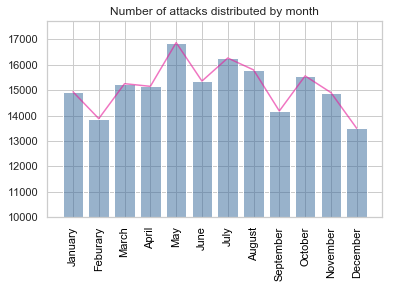

In [17]:
f, ax = plt.subplots(1)
xdata = month_lst
ydata = events_lst
bars = np.arange(len(xdata))
ax.bar(xdata, ydata, color=(0.2, 0.4, 0.6, 0.5))
ax.set_ylim(bottom=10000)
ax.plot(xdata, ydata,color=(0.9, 0.1, 0.6, 0.6))
plt.xticks(xdata, xdata, color='black', rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.title("Number of attacks distributed by month")
plt.show(f)

### We can see an uptick in attacks during the warmer months. And a decrease in the colder months - this is very obvious in the downward trend spanning from October to February. This is a recognized trend - terrorists and people in general tend to prefer warm weather for their actions.

In [18]:
from csv import DictReader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
gt = pd.read_csv('globaloffensive.csv', encoding='ISO-8859-1')
gt.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',
                     'country_txt':'Country','region_txt':'Region',
                     'attacktype1_txt':'AtkType','target1':'Target',
                     'gname':'Group','targtype1_txt':'TargType',
                     'weaptype1_txt':'WpnType','motive':'Motive'},inplace=True)

gt = gt[['Year', 'Month', 'Day', 'Country', 'Region', 'AtkType', 'Target', 'Group', 'TargType', 'WpnType', 'Motive']]

### Next, we decided to check the trend in the quantity of attacks throughout the years.

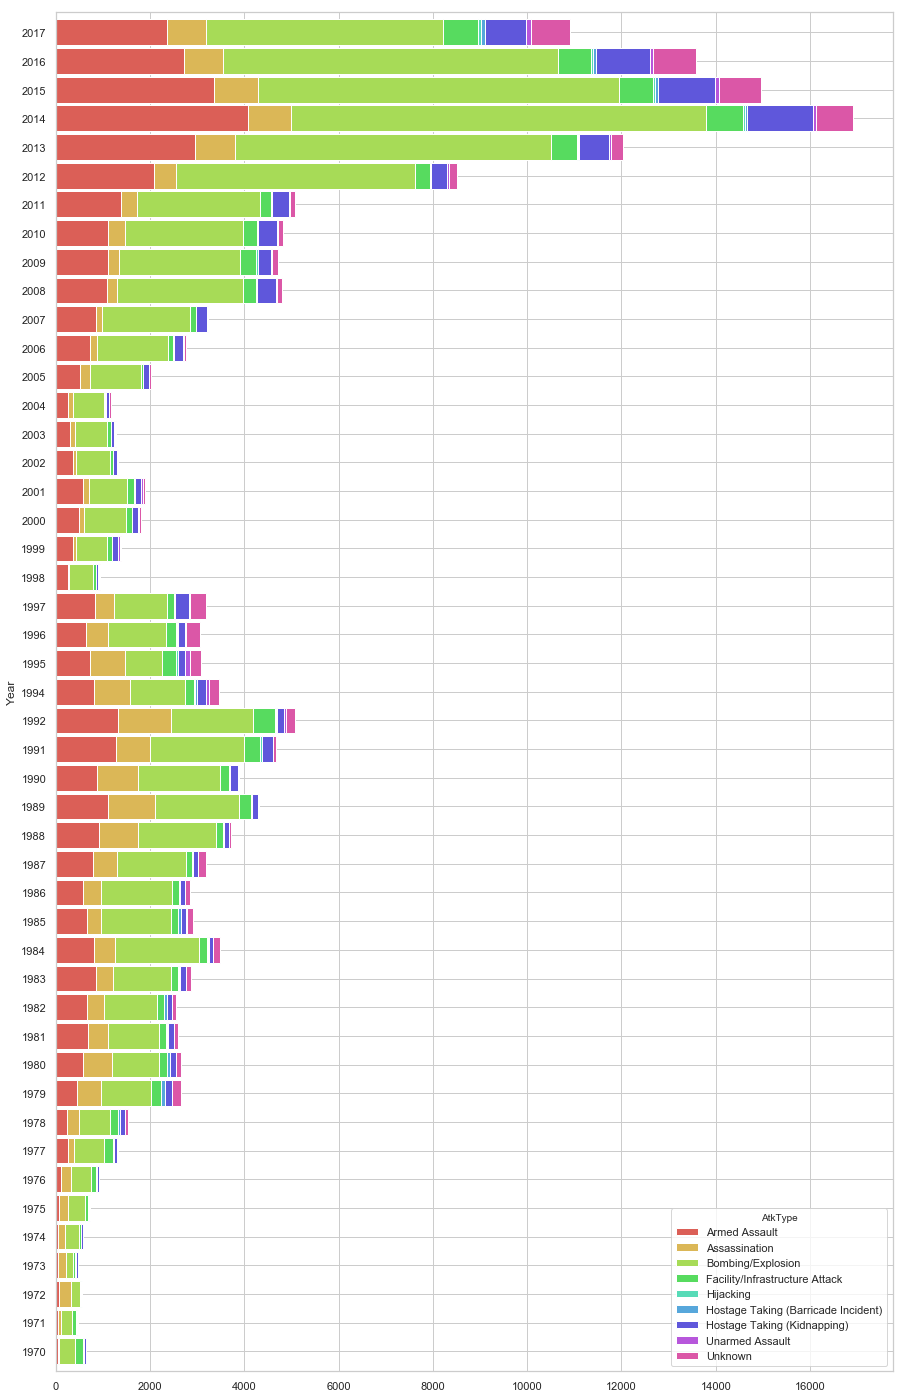

In [19]:
pd.crosstab(gt.Year, gt.AtkType).plot.barh(stacked=True, width=.9, color=sbn.hls_palette(9))
fig=plt.gcf()
fig.set_size_inches(15,25)
plt.show()

### Along with an increase in terrorist attacks, we expected there the percentage of bombing/explosion attacks would grow, as that is mostly what we hear in the media. This assumption turned out turned out to be incorrect. The ratios between the different types of attacks seem to fluctuate a bit, but overall tend to hold their own (ratios) throughout the years.

### It is as expected. Around 50% of the attacks are Bombings, followed by Armed Assaults.

### As the previous graph is focused more on the types of attacks, we  thus decided to focus on how the quantity of the attacks has fluctuated throughout the years. 

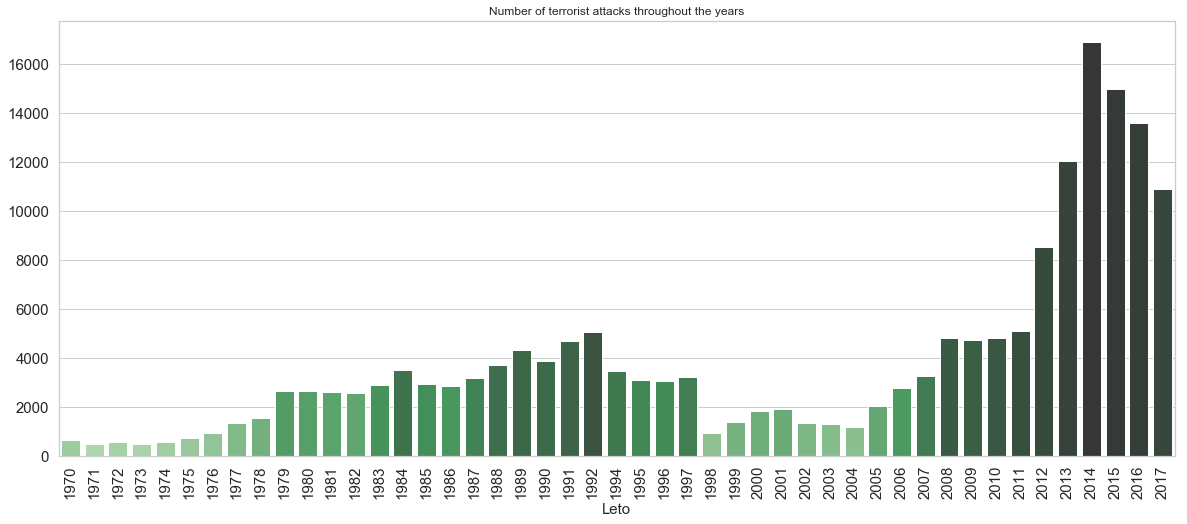

In [20]:
sbn.set(style="whitegrid", color_codes=True)
plt.subplots(figsize=(20,8))

data = gt.groupby("Year").size()   # data underlying bar plot in question

pal = sbn.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sbn.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])


plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('')
plt.xlabel('Leto', fontsize=15)
plt.title('Number of terrorist attacks throughout the years')
plt.show()

### The trend is obvious. Some events must have sparked an upsurge in terrorism. 

### Next we focus on the targets of these terror attacks.

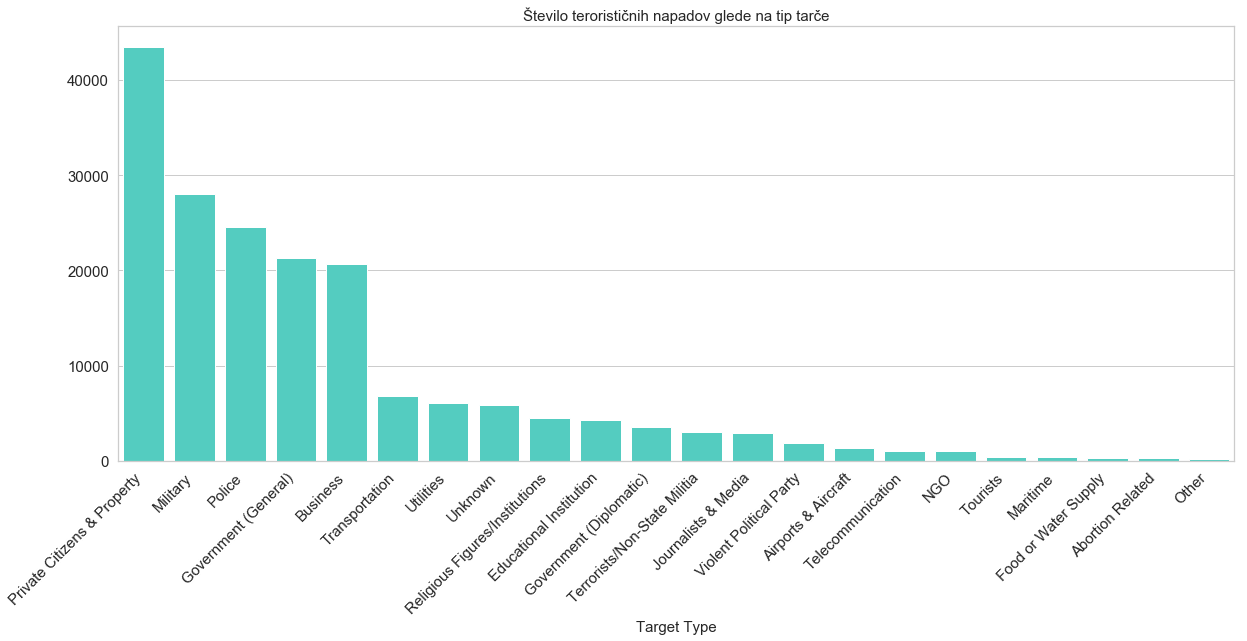

In [21]:
fig1, ax = plt.subplots(figsize=(20,8))
sbn.countplot('TargType', data=gt, color='turquoise',
              order=gt['TargType'].value_counts().index)
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Target Type',fontsize=15)
plt.ylabel('')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.title('Število terorističnih napadov glede na tip tarče',fontsize=15)
plt.show()

### The results are sadly as anticipated. Terrorists aim for citizens, as that sparks the most outrage in the media and puts nations on alarm.

### Then we began focusing on different regions. What regions are the hotspots for all these terrorist attacks?

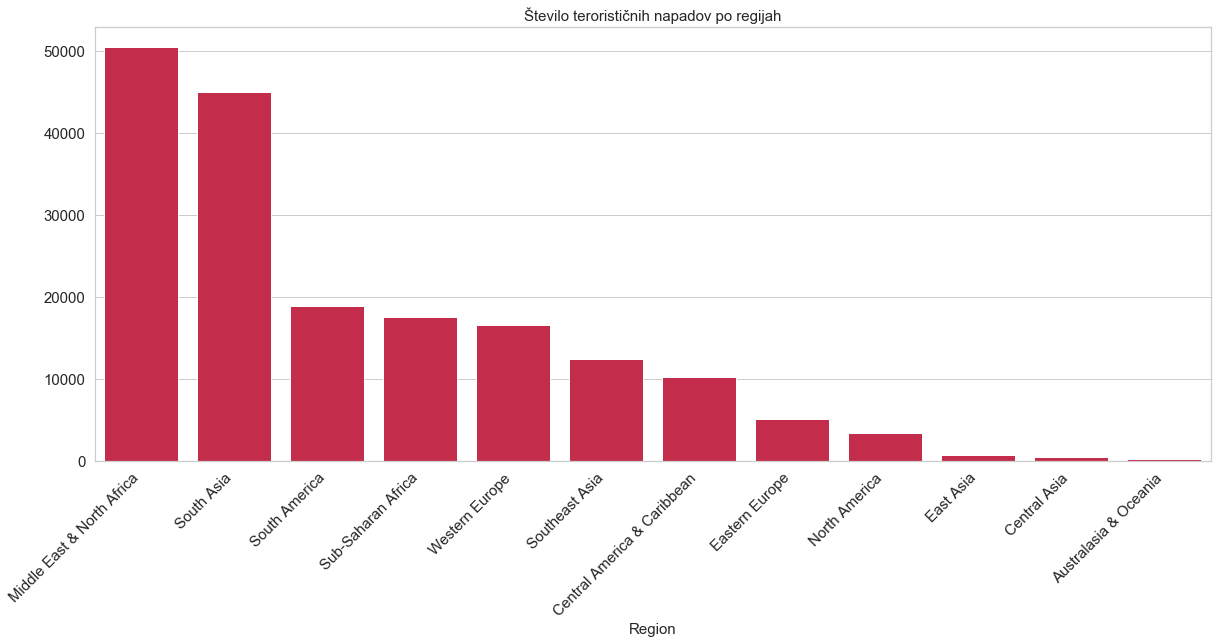

In [22]:
fig1, ax = plt.subplots(figsize=(20,8))
sbn.countplot('Region', data=gt, color='crimson',
              order=gt['Region'].value_counts().index)
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.title('Število terorističnih napadov po regijah',fontsize=15)
plt.show()

### Results are as expected. Middle East with Africa in the front. But the following bars sparked our interest. In the next graph we wish to observe what the hotspots for terror attacks were throughout the years. 

In [23]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from IPython.display import HTML

def animate(year):
    frame = df.loc[df['iyear'] == year]

    lon = frame['longitude'].values
    lat = frame['latitude'].values

    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In the World '+'\n'+'Year:' +str(year))

    crimeMap = Basemap(resolution='l', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,lat_0=True,lat_1=True,projection='mill')
    #,lon_0 = 10, lat_0 = 50, llcrnrlon = -20, llcrnrlat = 30, urcrnrlon = 55, urcrnrlat = 70,projection='mill' EU
    #llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,lat_0=True,lat_1=True,projection='mill' world
    #llcrnrlon = 63.737922, llcrnrlat = 2, urcrnrlon = 91.690393, urcrnrlat = 37.372773 India
    #llcrnrlon = -110.067617, llcrnrlat = -58.188627, urcrnrlon = -29.976469, urcrnrlat = 13.769698 South America
    #llcrnrlon = -150.102077, llcrnrlat = 3.728046, urcrnrlon = -35.475109, urcrnrlat = 65.583181 NA


    x, y = crimeMap(lon, lat)
    crimeMap.plot(x, y, 'go', markersize=2, color = "#1292db", alpha=0.4)
    crimeMap.drawcoastlines(linewidth=0.1, color="w")
    crimeMap.drawcountries(linewidth=0.1, color="w")
    crimeMap.fillcontinents(color='#191919',lake_color='#000000')
    crimeMap.drawmapboundary(fill_color='#000000')




df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1", delimiter=",", low_memory=False) 

df = df.dropna(axis=0, subset=['latitude','longitude','attacktype1_txt', 'iyear'])

years = set(df['iyear'].values)

fig = plt.figure(figsize = (15, 7))

anim = animation.FuncAnimation(fig, animate, years, interval = 1500)

video = HTML(anim.to_html5_video())

plt.close()

video

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

###### We had an issue with showing a .gif on Jupyter, so we embedded the gifs manually.

In [30]:
from IPython.display import HTML
HTML('<img src="world_anim.gif">')

### From 1975 to 2001 we see many attacks of terror in South America. It is interesting to view how quickly it waned after the September 11th, 2001 attack. America as a whole truly improved their home security, especially at airports - and it seems to have worked! 
### Sadly the situation got worse soon after - we can see an outburst of terrorist attacks in the Middle East region, after George W. Bush initiated the war in Iraq in 2005.
### Soon after, there is a large increase of terrorist attacks in the African region, and of course, in Europe.

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from IPython.display import HTML

def animate(year):
    frame = df.loc[df['iyear'] == year]

    lon = frame['longitude'].values
    lat = frame['latitude'].values

    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In Europe '+'\n'+'Year:' +str(year))

    crimeMap = Basemap(resolution='l', lon_0 = 10, lat_0 = 50, llcrnrlon = -20, llcrnrlat = 30, urcrnrlon = 55, urcrnrlat = 70,projection='mill')
    #,lon_0 = 10, lat_0 = 50, llcrnrlon = -20, llcrnrlat = 30, urcrnrlon = 55, urcrnrlat = 70,projection='mill' EU
    #llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,lat_0=True,lat_1=True,projection='mill' world
    #llcrnrlon = 63.737922, llcrnrlat = 2, urcrnrlon = 91.690393, urcrnrlat = 37.372773 India
    #llcrnrlon = -110.067617, llcrnrlat = -58.188627, urcrnrlon = -29.976469, urcrnrlat = 13.769698 South America
    #llcrnrlon = -150.102077, llcrnrlat = 3.728046, urcrnrlon = -35.475109, urcrnrlat = 65.583181 NA


    x, y = crimeMap(lon, lat)
    crimeMap.plot(x, y, 'go', markersize=2, color = "#1292db", alpha=0.4)
    crimeMap.drawcoastlines(linewidth=0.1, color="w")
    crimeMap.drawcountries(linewidth=0.1, color="w")
    crimeMap.fillcontinents(color='#191919',lake_color='#000000')
    crimeMap.drawmapboundary(fill_color='#000000')




df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1", delimiter=",", low_memory=False) 

df = df.dropna(axis=0, subset=['latitude','longitude','attacktype1_txt', 'iyear'])

years = set(df['iyear'].values)

fig = plt.figure(figsize = (15, 7))

anim = animation.FuncAnimation(fig, animate, years, interval = 1500)

video = HTML(anim.to_html5_video())

plt.close()

video

In [29]:
from IPython.display import HTML
HTML('<img src="eu_anim.gif">')

### We can see mild peace in Europe before the 2000s. That does not include, however, Northern Ireland and Northern Spain, more precisely Bilbao, where multiple revolutions were going on.

### What we gather from all this, is that terrorism is on an upwards trend. The last few years have noticed a decrease, but that does not mean that we can forget about it. We are quite lucky to live in Slovenia, "the jewel" of Europe. The small size and absence from world media and its events makes us a rather "bad" target for any terrorist attack, as it wouldn't drive to big media outrage, when compared to a terrorist attack in Paris, London, and other more "popular" social hubs.